In [67]:
import math
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
with open('q2_dataset.csv','r') as csvfile:
    dataset = list(csv.reader(csvfile))

    
#Turning to 1D
my_list = []
for i in dataset:
    my_list.append(i)

mse = np.zeros(5)
r_square = np.zeros(5)
mae = np.zeros(5)
mape = np.zeros(5)

mse_lasso = np.zeros(5)
r_square_lasso = np.zeros(5)
mae_lasso = np.zeros(5)
mape_lasso = np.zeros(5)

In [72]:
data = np.array(my_list)[1:,:]
data = data.astype('float64')
col_index = 0
for col in data.T:
    if col_index == 7:
        break
    else:
        data[:,col_index] = (data[:,col_index] - np.min(col)) / (np.max(col) - np.min(col))
        col_index = col_index + 1
#data[:,:-1] = (data[:,:-1] - np.mean(data[:,:-1],axis=0)) / np.std(data[:,:-1],axis=0)
np.random.shuffle(data)

X = data[:,:-1]
X = np.hstack((np.ones((X.shape[0],1)),X))
# X[:,0] = X[:,0] / np.linalg.norm(X[:,0],axis = 0)
Y = (data[:,-1]).reshape(500,1)

for i in range(0,5):
    tempx = X
    x_test = X[i*100:(i+1)*100,:]
    tempx = np.delete(tempx,slice(i*100,(i+1)*100 ),axis = 0)
    x_train = tempx
    tempy = Y
    y_test = Y[i*100:(i+1)*100,:]
    tempy = np.delete(tempy,slice(i*100,(i+1)*100 ),axis = 0)
    y_train = tempy
    
    theta = np.linalg.inv((x_train.T @ x_train))  @ (x_train.T) @ y_train
    y_approx = ( x_test @ theta)
    
    #Calculation of R^2,MSE,MAPE
    ss_res = np.sum((y_test - y_approx)**2,axis=0)
    ss_tot = np.sum((y_test - np.mean(y_test,axis = 0))**2)
   
    r_square[i] = 1 - (ss_res / ss_tot)
    mse[i] = ss_res / 100
    mae[i] = np.sum(abs(y_approx - y_test),axis=0) / 100
    mape[i] = np.sum(abs((y_approx - y_test)/y_test),axis=0)
    
    
    beta = np.random.normal(0, 0.01, size=(x_train.shape[1], 1))
    alpha = 0.00001;
    lmbd = 1;
    #running lasso
    for a in range(1000): 
        
        y_hat =  x_train @ beta
        k = x_train[:,1:]
        grad = -2 * ((y_train - y_hat).T @ k).reshape(7,1) + (lmbd * ( beta[1:] / abs(beta[1:])))
        grad0 = -2 * np.sum(y_train - y_hat)
        beta[0] = beta[0] - alpha*grad0
        beta[1:] =  beta[1:] - alpha*grad
        
        y_lasso = ( (x_test @ beta ) ).reshape(100,1)
    ss_res_lasso = np.sum((y_test - y_lasso)**2,axis=0)
    r_square_lasso[i] = 1 - (ss_res_lasso / ss_tot)
    mse_lasso[i] = ss_res_lasso / 100
    mae_lasso[i] = np.sum(abs(y_lasso - y_test),axis=0) / 100
    mape_lasso[i] = np.sum(abs((y_lasso - y_test)/y_test),axis=0)
    

In [73]:
d = {'R_Square': r_square, 'MSE': mse, 'MAE' : mae, 'MAPE' : mape}
df1 = pd.DataFrame(data = d)

d = {'R_Square': r_square_lasso, 'MSE': mse_lasso, 'MAE' : mae_lasso, 'MAPE' : mape_lasso}
df2 = pd.DataFrame(data = d)

In [74]:
df1

,R_Square,MSE,MAE,MAPE
0,0.855171,0.002748,0.038137,5.900686
1,0.850902,0.003483,0.045917,7.398030
2,0.816293,0.003387,0.042889,7.027631
3,0.822581,0.003529,0.041597,6.822544
4,0.731287,0.004949,0.046941,7.534778


In [42]:
df2 #for lambda = 0.01

,R_Square,MSE,MAE,MAPE
0,0.750658,0.005939,0.061344,10.276558
1,0.668753,0.005798,0.057887,8.942671
2,0.663961,0.005613,0.060180,9.150400
3,0.778978,0.003867,0.047149,7.313601
4,0.846098,0.003625,0.047439,7.408011


In [75]:
df2 # for lammbda = 1

,R_Square,MSE,MAE,MAPE
0,0.798270,0.003827,0.047959,7.207643
1,0.813945,0.004347,0.052850,8.539128
2,0.732005,0.004941,0.053137,8.423837
3,0.742791,0.005116,0.054717,8.933949
4,0.682517,0.005847,0.058414,9.123214


In [35]:
beta

array([[0.30145162],
       [0.12128696],
       [0.11743068],
       [0.07956783],
       [0.10818643],
       [0.12537569],
       [0.13808288],
       [0.0410683 ]])

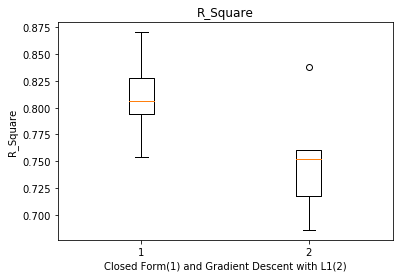

In [62]:
# for lambda = 1
fig = plt.figure() 
data = [r_square, r_square_lasso]
plt.boxplot(data) 
plt.title('R_Square')
plt.ylabel('R_Square')
plt.xlabel('Closed Form(1) and Gradient Descent with L1(2)') 
plt.savefig('r_square.png')
plt.show()

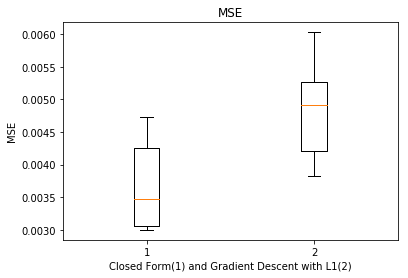

In [63]:
# for lambda = 1
fig = plt.figure() 
data = [mse, mse_lasso]
plt.boxplot(data) 
plt.title('MSE')
plt.ylabel('MSE')
plt.xlabel('Closed Form(1) and Gradient Descent with L1(2)') 
plt.savefig('mse.png')
plt.show()


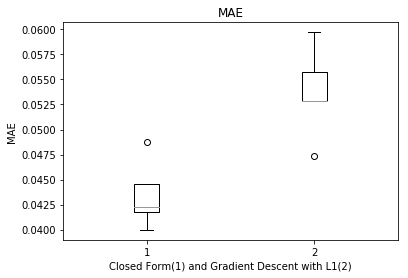

In [64]:
# for lambda = 1
fig = plt.figure() 
data = [mae, mae_lasso]
plt.boxplot(data) 
plt.title('MAE')
plt.ylabel('MAE')
plt.xlabel('Closed Form(1) and Gradient Descent with L1(2)') 
plt.savefig('mae.png')
plt.show()


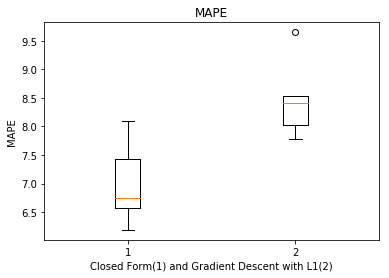

In [65]:
# for lambda = 1
fig = plt.figure() 
data = [mape, mape_lasso]
plt.boxplot(data) 
plt.title('MAPE')
plt.ylabel('MAPE')
plt.xlabel('Closed Form(1) and Gradient Descent with L1(2)') 
plt.savefig('mape.png')
plt.show()


In [66]:
X.shape

(500, 8)